#Código Python para implementar una neurona simple

Treball de Recerca d'Arnau Ayguadé. Institut Front Marítim. Barcelona


##1. Definición del dataset (atributos y etiquetas) i parametros de la neurona (W1, W2 y bias) i aprendizaje (learning_rate)

In [ ]:
import numpy as np

data = np.array([[ 0.0,  0.7],
                 [-0.3, -0.5],
                 [ 3.0,  0.1],
                 [-0.1, -1.0],
                 [-1.0,  1.1],
                 [ 2.1, -3.0]])
labels = np.array([ 1, 
                   -1,
                    1,
                   -1,
                   -1,
                    1])

#valores iniciales para los pesos
W1, W2, bias = 1, -2, -1
learning_rate = 0.005

##2. Código para hacer el test de la neurona con el dataset:

In [ ]:
def comprobacion(data, labels):
  num_correctos=0
  for i in range(data.shape[0]):
    y = W1 * data[i][0] + W2 * data[i][1] + bias
    if (y<0):
      z=-1
    else:
      z=1
    if(z==labels[i]):
      num_correctos = num_correctos + 1 

  print("El percentage de acierto es del " , (num_correctos / data.shape[0])*100)

##3. Código para hacer el entrenamiento de la neurona con el dataset:

In [ ]:
for epochs in range(100):
  for i in range(data.shape[0]):
    y = W1 * data[i][0] + W2 * data[i][1] + bias
    if (y<0):
      z=-1
    else:
      z=1
    if(z!=labels[i]):
      if((z==1) and (labels[i]==-1)):
        signe = -1
      if((z==-1) and (labels[i]==1)):
        signe = 1
    else:
      signe = 0
    W1 = W1 + signe * data[i][0] * learning_rate
    W2 = W2 + signe * data[i][1] * learning_rate
    bias = bias + signe * 1 * learning_rate
    
  comprobacion(data, labels)

El percentage de acierto es del  66.66666666666666
El percentage de acierto es del  66.66666666666666
El percentage de acierto es del  66.66666666666666
El percentage de acierto es del  66.66666666666666
El percentage de acierto es del  66.66666666666666
El percentage de acierto es del  66.66666666666666
El percentage de acierto es del  66.66666666666666
El percentage de acierto es del  66.66666666666666
El percentage de acierto es del  66.66666666666666
El percentage de acierto es del  66.66666666666666
El percentage de acierto es del  66.66666666666666
El percentage de acierto es del  66.66666666666666
El percentage de acierto es del  66.66666666666666
El percentage de acierto es del  66.66666666666666
El percentage de acierto es del  66.66666666666666
El percentage de acierto es del  66.66666666666666
El percentage de acierto es del  66.66666666666666
El percentage de acierto es del  66.66666666666666
El percentage de acierto es del  66.66666666666666
El percentage de acierto es del

##4. Visualizar por pantalla los valores actuales de W1, W2 y bias:

In [ ]:
print(W1, W2, bias)

1.0499999999999945 -1.1500000000000048 -1.0


##5. Visualizar por pantalla espacio de datos y función de la neurona:

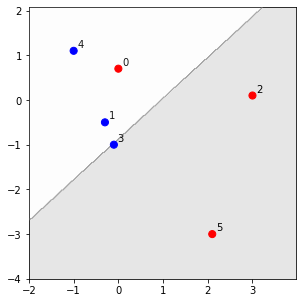

In [ ]:
import matplotlib.pyplot as plt

def plot_data(data, labels):
  fig = plt.figure(figsize=(5,5))
  ax = fig.add_subplot(111)
  ax.scatter(data[:,0], data[:,1], c=labels, s=50, cmap=plt.cm.bwr, zorder=50)
  nudge = 0.08
  for i in range(data.shape[0]):
    d = data[i]
    ax.annotate(f'{i}', (d[0]+nudge, d[1]+nudge))
  ax.set_aspect('equal', 'datalim')
  plt.show()

def create_meshgrid(data):
  h=0.02
  x_min, x_max = data[:,0].min() - 1, data[:,0].max() + 1
  y_min, y_max = data[:,1].min() - 1, data[:,1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
  return (xx, yy, np.ones(xx.shape))

def plot_learning(grid, data, W1, W2, bias):
  xx, yy, Z = grid
  for i in range(xx.shape[0]):
    for j in range(yy.shape[1]):
      X, Y = xx[i][j], yy[i][j]
      output = W1 * X + W2 * Y + bias
      output = 1 if output > 0 else -1
      Z[i][j] = output

  fig = plt.figure(figsize=(5,5))
  ax = fig.add_subplot(111)
  ax.contourf(xx, yy, Z, cmap=plt.cm.binary, alpha=0.1, zorder=15)
  ax.scatter(data[:,0], data[:,1], c=labels, s=50, cmap=plt.cm.bwr, zorder=50)
  ax.set_aspect('equal')
  nudge = 0.08
  for i in range(data.shape[0]):
    d = data[i]
    ax.annotate(f'{i}', (d[0]+nudge, d[1]+nudge))
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.show()

grid = create_meshgrid(data)
plot_learning(grid, data, W1, W2, bias)